In [20]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = r"C:\Users\Administrator\Documents"
os.chdir(path)
os.listdir(path)

['.RData',
 '.Rhistory',
 'Amazon',
 'Book1.xlsx',
 'Book1z.xlsx',
 'Book2.xlsx',
 'Book3.xlsx',
 'Call Centre Analysis- Data set',
 'Call Centre Analysis- Data set.rar',
 'Cars.xlsx',
 'Chapter 3 - R Overview.pdf',
 'chisqtab.pdf',
 'covariance, correlation sums.xlsx',
 'Custom Office Templates',
 'daily-minimum-temperatures.xlsx',
 'Data and time.xlsx',
 'day1.txt.R',
 'day2.1.R.RData',
 'day2.R',
 'day2.txt',
 'day3.txt',
 'desktop.ini',
 'Drinks.xlsx',
 'EDA',
 'Election data base.xlsb',
 'Election data base.xlsx',
 'Fin_Exercises 1.docx',
 'freq_dist_data_out.csv',
 'FTable.pdf',
 'homicide.csv',
 'Hospitality_Management_Paper_Stats.pdf',
 'HR Analytics.csv',
 'HR Analytics.docx',
 'Internship Survey.xls',
 'IPL Data',
 'Kolmogorv-Smirnov Test.pdf',
 'kruskalwallish.pdf',
 'My Data Sources',
 'My Music',
 'My Pictures',
 'My Videos',
 'narendramodi_tweets.xlsx',
 'NumPy & Pandas_ detailed syllabi.docx',
 'odi-batting.csv',
 'penalty_data.csv',
 'Predicting_Customer_Behaviour_data_

In [21]:
election=pd.read_excel('Election data base.xlsx')

In [22]:
election.head()

,st_name,year,ac_no,ac_name,ac_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors
0,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Manabala Ramarao,M,Independent,IND,813.0,83247
1,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Appadu Sahu,M,Independent,IND,1743.0,83247
2,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Uppada Rangababu,M,Indian National Congress,INC,4427.0,83247
3,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Kalla Balarama Swamy,M,Indian National Congress (I),INC(I),19805.0,83247
4,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Bendalam Venkatesam Sarma,M,Janata Party,JNP,34251.0,83247


In [23]:
#Which column of my data set has missing values

Null_value = election.isnull().sum()

Null_value

st_name           0
year              0
ac_no             0
ac_name       16083
ac_type           0
cand_name         1
cand_sex       5302
partyname         0
partyabbre     2706
totvotpoll        7
electors          0
dtype: int64

In [24]:
P = (Null_value/len(election.index))*100
P

st_name       0.000000
year          0.000000
ac_no         0.000000
ac_name       4.913931
ac_type       0.000000
cand_name     0.000306
cand_sex      1.619950
partyname     0.000000
partyabbre    0.826780
totvotpoll    0.002139
electors      0.000000
dtype: float64

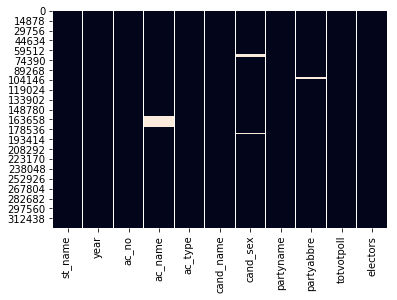

In [25]:
#Plotting the missing value

sns.heatmap(election.isnull(), cbar=False)

In [26]:
#Filling the missing values by 0 in totvotpoll

election['Fill_by_zero'] = election['totvotpoll'].fillna(0)

Null_value = election.isnull().sum()

Null_value

st_name             0
year                0
ac_no               0
ac_name         16083
ac_type             0
cand_name           1
cand_sex         5302
partyname           0
partyabbre       2706
totvotpoll          7
electors            0
Fill_by_zero        0
dtype: int64

In [27]:
#ffill=forward fill--> copy value from previous cell
#bfill=backward fill--> copy value from next cell

election['Fill_by_ffill'] = election['totvotpoll'].fillna(method='ffill')

Null_value = election.isnull().sum()

Null_value

st_name              0
year                 0
ac_no                0
ac_name          16083
ac_type              0
cand_name            1
cand_sex          5302
partyname            0
partyabbre        2706
totvotpoll           7
electors             0
Fill_by_zero         0
Fill_by_ffill        0
dtype: int64

In [28]:
#Filter the data for the state of sikkim for the year 2004

mean=election['totvotpoll'].mean()
mean

9299.67342118691

In [29]:
election['fill_by_mean']=election['totvotpoll'].fillna(mean)

In [30]:
election['Fill_by_zero'] = election['totvotpoll'].fillna(method='ffill')

Null_value = election.isnull().sum()

Null_value

st_name              0
year                 0
ac_no                0
ac_name          16083
ac_type              0
cand_name            1
cand_sex          5302
partyname            0
partyabbre        2706
totvotpoll           7
electors             0
Fill_by_zero         0
Fill_by_ffill        0
fill_by_mean         0
dtype: int64

In [31]:
sik_data=election[election['st_name']=='Sikkim']
sik_data.head()

,st_name,year,ac_no,ac_name,ac_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors,Fill_by_zero,Fill_by_ffill,fill_by_mean
228351,Sikkim,1979.0,1,Yoksam,GEN,Mangal Limboo,M,Sikkim Congress (R),SCR,143.0,3743,143.0,143.0,143.0
228352,Sikkim,1979.0,1,Yoksam,GEN,Chewang Dorjee Bhutia,M,Independents,IND,153.0,3743,153.0,153.0,153.0
228353,Sikkim,1979.0,1,Yoksam,GEN,Ram Bahadur Limboo,M,Janta Party,JNP,311.0,3743,311.0,311.0,311.0
228354,Sikkim,1979.0,1,Yoksam,GEN,Mohan Kumar Gurung,M,Sikkim Prajatantra Congress,SPC,468.0,3743,468.0,468.0,468.0
228355,Sikkim,1979.0,1,Yoksam,GEN,Ashok Kumar Subba,M,Independents,IND,556.0,3743,556.0,556.0,556.0


In [32]:
sik1=sik_data[sik_data['year']==2004]

In [33]:
sik1

,st_name,year,ac_no,ac_name,ac_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors,Fill_by_zero,Fill_by_ffill,fill_by_mean
229199,Sikkim,2004.0,1,Yoksam,GEN,Akar Dhoj Limbu,M,Sikkim Himali Rajya Parishad,SHRP,107.0,8035,107.0,107.0,107.000000
229200,Sikkim,2004.0,1,Yoksam,GEN,Mangal Bir Subba,M,Indian National Congress,INC,2427.0,8035,2427.0,2427.0,2427.000000
229201,Sikkim,2004.0,1,Yoksam,GEN,Kalawati Subba,F,Sikkim Democratic Front,SDF,3947.0,8035,3947.0,3947.0,3947.000000
229202,Sikkim,2004.0,2,Tashiding,BL,Pulling Lepcha,M,Independent,IND,85.0,6365,85.0,85.0,85.000000
229203,Sikkim,2004.0,2,Tashiding,BL,Sonam Dadul Kazi,M,Indian National Congress,INC,1778.0,6365,1778.0,1778.0,1778.000000
229204,Sikkim,2004.0,2,Tashiding,BL,Dawa Narbu Takarpa,M,Sikkim Democratic Front,SDF,3509.0,6365,3509.0,3509.0,3509.000000
229205,Sikkim,2004.0,3,Geyzing,GEN,Chandra Bahadur Katwal,M,Independent,IND,64.0,8574,64.0,64.0,64.000000
229206,Sikkim,2004.0,3,Geyzing,GEN,Dhan Bahadur Gurung,M,Independent,IND,69.0,8574,69.0,69.0,69.000000
229207,Sikkim,2004.0,3,Geyzing,GEN,Dal Bdr. Gurung,M,Indian National Congress,INC,2410.0,8574,2410.0,2410.0,2410.000000
229208,Sikkim,2004.0,3,Geyzing,GEN,Sher Bahadur Subedi,M,Sikkim Democratic Front,SDF,4227.0,8574,4227.0,4227.0,4227.000000


In [34]:
df = election.dropna()

print("original data shape:",election.shape)
print("shape after removing missing value from rows:",df.shape)

original data shape: (327294, 14)
shape after removing missing value from rows: (303195, 14)


In [35]:
#dropping the values

#dropping the rows

df = election.dropna(axis=1)

print("original data shape:",election.shape)
print("shape after removing missing value from rows:",df.shape)

original data shape: (327294, 14)
shape after removing missing value from rows: (327294, 9)


In [38]:
!pip install missingpy

In [42]:
#pip install missingpy

from missingpy import KNNImputer


demo = pd.read_excel('knndemo.xlsx')


In [43]:
demo

,x1,x2,x3,x4
0,1.0,3,NaN,8
1,2.0,4,6.0,8
2,NaN,3,5.0,7
3,3.0,3,3.0,3


In [45]:
#creating the imputation object - declaring some parameters

imputer = KNNImputer(missing_values="NaN", metric="masked_euclidean", n_neighbors=3)  #what

new_demo = imputer.fit_transform(demo[['x3']])
new_demo

C:\ProgramData\Anaconda3\lib\site-packages\missingpy\knnimpute.py:224: UserWarning: There are rows with more than 50.0% missing values. These rows are not included as donor neighbors.
  .format(self.row_max_missing * 100))
C:\ProgramData\Anaconda3\lib\site-packages\missingpy\knnimpute.py:282: UserWarning: There are rows with more than 50.0% missing values. The missing features in these rows are imputed with column means.
  .format(self.row_max_missing * 100))


array([[4.66666667],
       [6.        ],
       [5.        ],
       [3.        ]])

In [49]:
imputer = KNNImputer(missing_values="NaN", metric="masked_euclidean", n_neighbors=4)  #what

new_demo = imputer.fit_transform(demo)
new_demo

C:\ProgramData\Anaconda3\lib\site-packages\missingpy\knnimpute.py:143: UserWarning: Insufficient number of neighbors! Filling in column mean.
  warnings.warn("Insufficient number of neighbors! "
C:\ProgramData\Anaconda3\lib\site-packages\missingpy\knnimpute.py:143: UserWarning: Insufficient number of neighbors! Filling in column mean.
  warnings.warn("Insufficient number of neighbors! "


array([[1.        , 3.        , 4.66666667, 8.        ],
       [2.        , 4.        , 6.        , 8.        ],
       [2.        , 3.        , 5.        , 7.        ],
       [3.        , 3.        , 3.        , 3.        ]])

In [50]:
from pydataset import data

df = data('iris')

df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [51]:
#Removing the last column

df1 = df.drop(columns=['Species'])
df1.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [58]:
#Importing KMeans Function using sklearn
from sklearn.cluster import KMeans

#Create the kmeans object

km = KMeans(n_clusters=3, init = 'k-means++', random_state=1234)

In [59]:
# Fitting the model of my data

km.fit(df1.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1234, tol=0.0001, verbose=0)

In [60]:
#df1.values

#Identifying the centroids coordinate
km.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [61]:
#Creating the column in our data set

df1['Cluster'] = km.predict(df1.values)

df1.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Cluster
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


In [62]:
df1.groupby(['Cluster']).size()

Cluster
0    50
1    62
2    38
dtype: int64

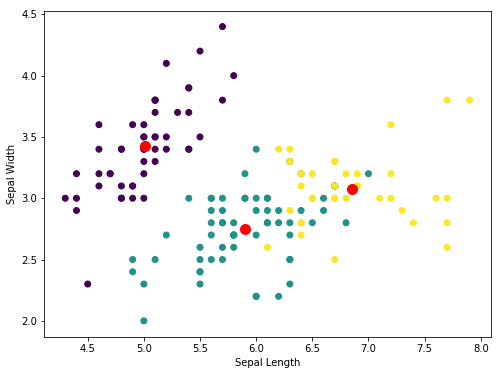

In [68]:
#Lets plot the scatter plot for sepal length and sepal width

from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [8,6]

plt.scatter(df1['Sepal.Length'], df1['Sepal.Width'], c=df1['Cluster'])

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

#Will also draw the centroids

plt.scatter(km.cluster_centers_[ : , 0], km.cluster_centers_[ : , 1], c = 'red', s=100)

plt.show()

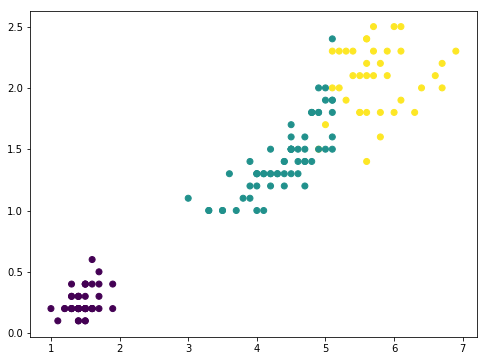

In [69]:
plt.scatter(df1['Petal.Length'], df1['Petal.Width'], c=df1['Cluster'])

In [94]:
election.columns

Index(['st_name', 'year', 'ac_no', 'ac_name', 'ac_type', 'cand_name',
       'cand_sex', 'partyname', 'partyabbre', 'totvotpoll', 'electors',
       'Fill_by_zero', 'Fill_by_ffill', 'fill_by_mean'],
      dtype='object')

In [95]:
new_election = election[['st_name','totvotpoll','electors']]
new_election.head()

,st_name,totvotpoll,electors
0,Andhra Pradesh,813.0,83247
1,Andhra Pradesh,1743.0,83247
2,Andhra Pradesh,4427.0,83247
3,Andhra Pradesh,19805.0,83247
4,Andhra Pradesh,34251.0,83247


In [98]:
st= new_election.groupby('st_name')['totvotpoll','electors'].mean().reset_index()
st.head()

,st_name,totvotpoll,electors
0,Andhra Pradesh,12888.341450,214573.167908
1,Arunachal Pradesh,2435.059347,13016.475204
2,Assam,8408.626607,102227.586949
3,Bihar,6436.221233,174116.294425
4,Chhattisgarh,11302.725093,175266.152989


In [99]:
new_election1 = st[['totvotpoll','electors']]
new_election1.head()

,totvotpoll,electors
0,12888.341450,214573.167908
1,2435.059347,13016.475204
2,8408.626607,102227.586949
3,6436.221233,174116.294425
4,11302.725093,175266.152989


In [100]:
km1 = KMeans(n_clusters=3, init = 'k-means++', random_state=1234)
km1.fit(new_election1.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1234, tol=0.0001, verbose=0)

In [101]:
km1.cluster_centers_

array([[  4023.36286569,  28297.78994336],
       [ 10288.6312337 , 195898.29285355],
       [  9785.1653967 , 127631.26518   ]])

In [102]:
new_election1["Cluster"] = km1.predict(new_election1.values)
new_election1.head()

,totvotpoll,electors,Cluster
0,12888.341450,214573.167908,1
1,2435.059347,13016.475204,0
2,8408.626607,102227.586949,2
3,6436.221233,174116.294425,1
4,11302.725093,175266.152989,1


In [103]:
new_election1.groupby("Cluster").size()

Cluster
0    11
1     9
2    10
dtype: int64

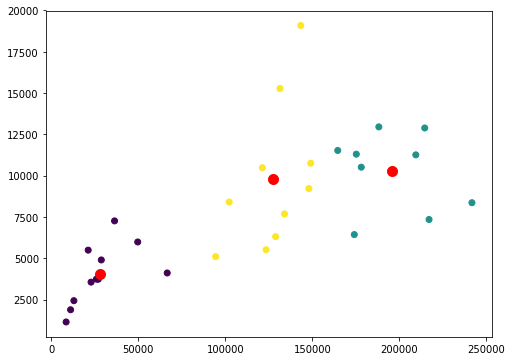

In [105]:
plt.scatter(new_election1["electors"],new_election1["totvotpoll"],c=new_election1['Cluster'])
plt.scatter(km1.cluster_centers_[:,1], km1.cluster_centers_[:,0], c='red', s=100)
plt.show()

In [106]:
km1 = KMeans(n_clusters=1, init = 'k-means++', random_state=1234)

In [109]:
km1.fit(df1.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1234, tol=0.0001, verbose=0)

In [110]:
km1.inertia_

768.4105999999999

In [113]:
km2 = KMeans(n_clusters=2, init = 'k-means++', random_state=1234)

km2.fit(df1.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1234, tol=0.0001, verbose=0)

In [114]:
km2.inertia_

177.7202495543672

In [117]:
cluster_error = []

for i in range(1,15):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=1234)
    
    kmeans.fit(df1.values)
    
    cluster_error.append(kmeans.inertia_)

In [118]:
cluster_error

[768.4105999999999,
 177.7202495543672,
 78.85144142614601,
 59.34876557610241,
 46.98506112266112,
 39.57886631746632,
 35.16869942557443,
 31.484237713267124,
 28.92799560552966,
 27.525782758907766,
 24.93338328317597,
 23.312646309400954,
 22.42053183817387,
 20.657508048968573]

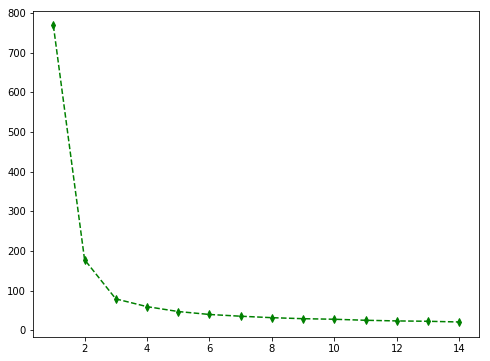

In [126]:
plt.plot(range(1,15), cluster_error, marker='d',color='green',linestyle='--',markersize=5)